In [1]:
%matplotlib inline
import os.path as op

import matplotlib.pyplot as plt
from nilearn import image, plotting

from nimare.meta.cbma.sdm import _simulate_subject_maps
from nimare.utils import get_resource_path, get_masker, get_template

masker = get_masker(get_template("mni152_2mm", "brain"))

n_subjects = [10]
correlation_map = op.join(get_resource_path(), "gray_matter_correlations.nii.gz")
correlation_maps = {
    "right": image.index_img(correlation_map, 0).get_fdata(),
    "posterior": image.index_img(correlation_map, 1).get_fdata(),
    "inferior": image.index_img(correlation_map, 2).get_fdata(),
}

/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
<ipython-input-2-c27b3c542cef>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


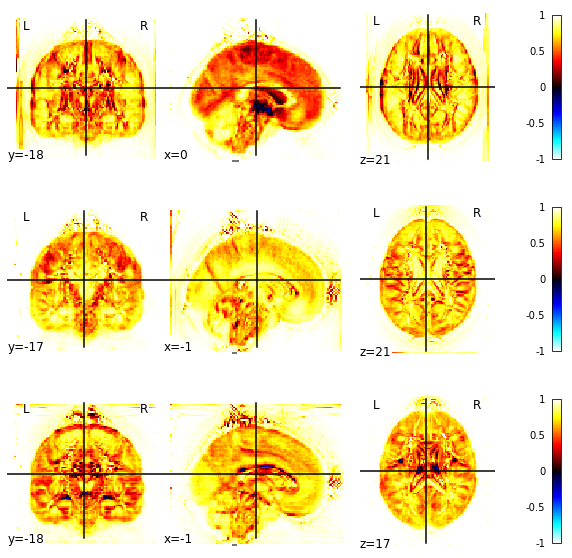

In [2]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3)
for i in range(3):
    temp = image.index_img(correlation_map, i)
    plotting.plot_stat_map(temp, axes=axes[i], figure=fig)

fig.show()

In [3]:
raw_subject_effect_size_imgs = _simulate_subject_maps(n_subjects, masker, correlation_maps)

Studies:   0%|          | 0/1 [00:00<?, ?it/s]

Voxel:   0%|          | 0/228483 [00:00<?, ?it/s]

[]
[0 1 2 3]


In [4]:
subj_imgs = masker.inverse_transform(raw_subject_effect_size_imgs)

<ipython-input-5-695e2be3b21c>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


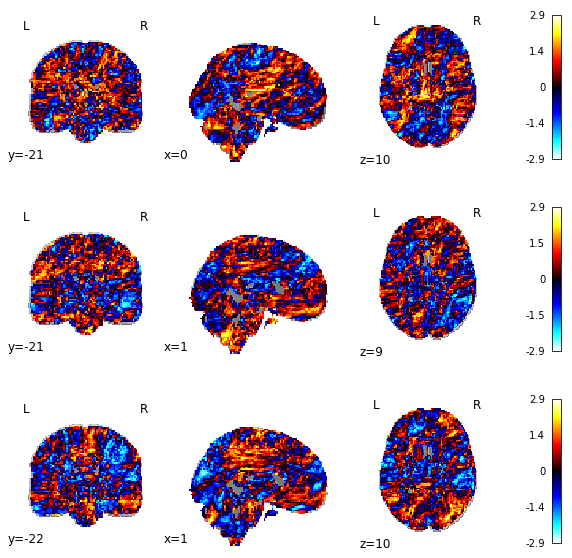

In [5]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3)
for i in range(3):
    temp = image.index_img(subj_imgs, i)
    plotting.plot_stat_map(temp, axes=axes[i], figure=fig, draw_cross=False)

fig.show()

In [6]:
corr_data = masker.transform(correlation_map)